In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv('Data/selected_features.csv')

In [3]:
df.head()

,NACCID,CDRSUM,DECIN,MOSLOW,MEMORY,SPEECH,BILLS,TRAVEL,MOFALLS,MOTREM,...,TOBAC30,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOHOL,DIABETES,HYPERTEN,CVHATT,SEX
0,NACC235922,3.5,1,0,1.0,-4,1,0,0,0,...,0,1,22,2,40,0,0,1,0,2
1,NACC383757,0.5,8,0,0.5,-4,0,0,0,0,...,0,1,15,5,28,2,0,1,0,1
2,NACC418253,2.0,1,0,1.0,-4,0,0,0,0,...,0,1,10,2,30,0,0,0,0,2
3,NACC433163,0.5,1,0,0.5,-4,8,0,0,1,...,0,1,2,2,17,0,0,0,0,1
4,NACC476187,5.0,1,0,1.0,-4,3,3,0,0,...,0,1,25,2,45,0,0,1,0,1


In [4]:
df = df.drop('NACCID', axis=1)

**Linear Regression**

In [5]:
#dummy coding categorical variables
df_encoded = pd.get_dummies(df, columns=['SEX', 'TOBAC30', 'TOBAC100', 'ALCOHOL', 'DIABETES', 'HYPERTEN', 'CVHATT', 'DECIN', 'MOSLOW', 'MEMORY', 'SPEECH', 'BILLS', 'TRAVEL', 'MOFALLS', 'MOTREM'], drop_first=True)
y = df_encoded['CDRSUM']
X = df_encoded.drop(columns=['CDRSUM'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
y

0        3.5
1        0.5
2        2.0
3        0.5
4        5.0
        ... 
13684    0.0
13685    0.0
13686    0.0
13687    0.0
13688    0.0
Name: CDRSUM, Length: 13689, dtype: float64

In [7]:
df_encoded

,CDRSUM,NACCAGE,NACCBMI,SMOKYRS,PACKSPER,QUITSMOK,SEX_2,TOBAC30_1,TOBAC30_9,TOBAC100_1,...,TRAVEL_0,TRAVEL_1,TRAVEL_2,TRAVEL_3,TRAVEL_8,TRAVEL_9,MOFALLS_1,MOFALLS_9,MOTREM_1,MOTREM_9
0,3.5,72,31.9,22,2,40,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0.5,76,27.2,15,5,28,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,2.0,73,20.8,10,2,30,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0.5,77,26.8,2,2,17,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,5.0,84,26.7,25,2,45,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13684,0.0,69,27.3,7,1,25,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
13685,0.0,70,26.9,7,1,25,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
13686,0.0,71,26.7,7,1,25,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
13687,0.0,72,26.8,7,1,25,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [6]:

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Once the model is trained, you can make predictions on the test data
predictions = model.predict(X_test)

In [9]:
print('model intercept :', model.intercept_) 
print('model coefficients : ', model.coef_) 
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

model intercept : -0.6478909571391449
model coefficients :  [-4.92143018e-03  2.30510592e-03  3.36029315e-03  6.38953729e-03
 -1.85078725e-03 -6.73891172e-02 -1.52729421e-02  2.42826573e-02
  1.06026135e+00  1.23399245e+00  1.15816289e-01  9.00604315e-02
 -6.68366980e-01  1.43187531e-02  1.19899009e-01 -1.85863447e-01
 -8.99719864e-03 -2.91861827e-03  2.82636735e-01 -2.49965792e-01
 -6.44238763e-03 -3.65654584e-01  1.38055139e-01 -1.53682661e-02
  6.69278757e-03  3.27659648e-01 -1.22924783e-01  7.62181583e-01
  2.78859383e+00  6.68046904e+00  1.19121448e+01  4.43175975e-02
  8.49283917e-02  6.50359197e-01  1.62483121e+00  2.99179363e+00
  1.79084529e+00 -3.00287251e-02  5.59773103e-02  3.85432470e-01
  1.11253406e+00  4.49824516e-01 -4.41892092e-02 -1.12589757e-01
  1.26846058e-01  5.44820099e-01  1.60634405e+00  2.33514134e-01
 -4.69384166e-01  5.79410179e-01  5.29548656e-01 -1.53173162e-01
 -4.11361988e-01]
Mean Squared Error (MSE): 0.7459778745788452
R-squared: 0.9130803861566442
Me

In [32]:
import statsmodels.formula.api as sm
model = sm.ols("CDRSUM ~ NACCAGE+NACCBMI+SMOKYRS+PACKSPER+QUITSMOK+SEX_2+ALCOHOL_1+ALCOHOL_2+ALCOHOL_9+DIABETES_1+DIABETES_2+DIABETES_9+HYPERTEN_1+HYPERTEN_2+HYPERTEN_9+CVHATT_1+CVHATT_2+CVHATT_9+DECIN_1+DECIN_8+DECIN_9+MOSLOW_1+MOSLOW_9+SPEECH_0+SPEECH_1+SPEECH_2+SPEECH_3+SPEECH_4+SPEECH_8+BILLS_0+BILLS_1+BILLS_2+BILLS_3+BILLS_8+BILLS_9+TRAVEL_0+TRAVEL_1+TRAVEL_2+TRAVEL_3+TRAVEL_8+TRAVEL_9+MOFALLS_1+MOFALLS_9+MOTREM_1+MOTREM_9", data = df_encoded).fit()
results_summary = model.summary()
print(results_summary)

                            OLS Regression Results                            
Dep. Variable:                 CDRSUM   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     873.4
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:39:14   Log-Likelihood:                -24905.
No. Observations:               13689   AIC:                         4.990e+04
Df Residuals:                   13644   BIC:                         5.024e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7109      0.170     10.065      0.0

In [28]:
joined_string = "+".join(X.columns)
joined_string

'NACCAGE+NACCBMI+SMOKYRS+PACKSPER+QUITSMOK+SEX_2+TOBAC30_1+TOBAC30_9+TOBAC100_1+TOBAC100_9+ALCOHOL_1+ALCOHOL_2+ALCOHOL_9+DIABETES_1+DIABETES_2+DIABETES_9+HYPERTEN_1+HYPERTEN_2+HYPERTEN_9+CVHATT_1+CVHATT_2+CVHATT_9+DECIN_1+DECIN_8+DECIN_9+MOSLOW_1+MOSLOW_9+MEMORY_0.5+MEMORY_1.0+MEMORY_2.0+MEMORY_3.0+SPEECH_0+SPEECH_1+SPEECH_2+SPEECH_3+SPEECH_4+SPEECH_8+BILLS_0+BILLS_1+BILLS_2+BILLS_3+BILLS_8+BILLS_9+TRAVEL_0+TRAVEL_1+TRAVEL_2+TRAVEL_3+TRAVEL_8+TRAVEL_9+MOFALLS_1+MOFALLS_9+MOTREM_1+MOTREM_9'

In [30]:
X.columns

Index(['NACCAGE', 'NACCBMI', 'SMOKYRS', 'PACKSPER', 'QUITSMOK', 'SEX_2',
       'TOBAC30_1', 'TOBAC30_9', 'TOBAC100_1', 'TOBAC100_9', 'ALCOHOL_1',
       'ALCOHOL_2', 'ALCOHOL_9', 'DIABETES_1', 'DIABETES_2', 'DIABETES_9',
       'HYPERTEN_1', 'HYPERTEN_2', 'HYPERTEN_9', 'CVHATT_1', 'CVHATT_2',
       'CVHATT_9', 'DECIN_1', 'DECIN_8', 'DECIN_9', 'MOSLOW_1', 'MOSLOW_9',
       'MEMORY_0.5', 'MEMORY_1.0', 'MEMORY_2.0', 'MEMORY_3.0', 'SPEECH_0',
       'SPEECH_1', 'SPEECH_2', 'SPEECH_3', 'SPEECH_4', 'SPEECH_8', 'BILLS_0',
       'BILLS_1', 'BILLS_2', 'BILLS_3', 'BILLS_8', 'BILLS_9', 'TRAVEL_0',
       'TRAVEL_1', 'TRAVEL_2', 'TRAVEL_3', 'TRAVEL_8', 'TRAVEL_9', 'MOFALLS_1',
       'MOFALLS_9', 'MOTREM_1', 'MOTREM_9'],
      dtype='object')

TypeError: ylabel() missing 1 required positional argument: 'ylabel'

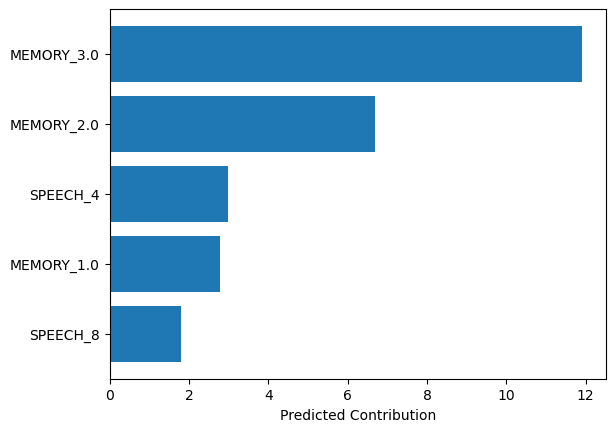

In [7]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)

top_5 = coef_df_sorted.head(5)

# Plot

plt.barh(top_5['Feature'], top_5['Coefficient'])
plt.xlabel(xlabel = 'Predicted Contribution')
plt.gca().invert_yaxis()  
plt.xticks()
plt.yticks()
plt.ylabel()
plt.show()

plt.show()

**Random Forest**

**100 trees**

In [8]:

# Create a RandomForestRegressor object
model2 = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees with n_estimators

# Fit the model to the training data
model2.fit(X_train, y_train)

# Make predictions on the test data
predictions = model2.predict(X_test)

In [9]:
# Calculate evaluation metrics
mse_2 = mean_squared_error(y_test, predictions)
r2_2 = r2_score(y_test, predictions)
mae_2 = mean_absolute_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse_2)
print("R-squared:", r2_2)
print("Mean Absolute Error (MAE):", mae_2)

Mean Squared Error (MSE): 0.4236899561723886
R-squared: 0.9506326278100357
Mean Absolute Error (MAE): 0.25998295592890186


TypeError: ylabel() missing 1 required positional argument: 'ylabel'

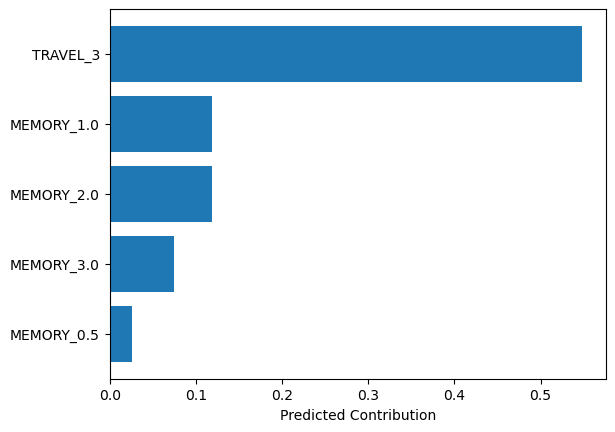

In [10]:
feature_importances = model2.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Plot

plt.barh(importance_df_sorted['Feature'][:5], importance_df_sorted['Importance'][:5])
plt.xlabel(xlabel = 'Predicted Contribution')
plt.gca().invert_yaxis()  
plt.xticks()
plt.yticks()
plt.ylabel()
plt.show()

plt.show()

In [ ]:
tree_to_plot = model2.estimators_[0]

# Plot the selected tree
plt.figure(figsize=(10,6))
plot_tree(tree_to_plot, filled=True, feature_names=X_train.columns, max_depth=2)
# Modify text properties in the plotted tree
for text in plt.gca().texts:
    text.set_fontsize(11)  # Adjust the fontsize as needed


plt.show()

**150 trees**

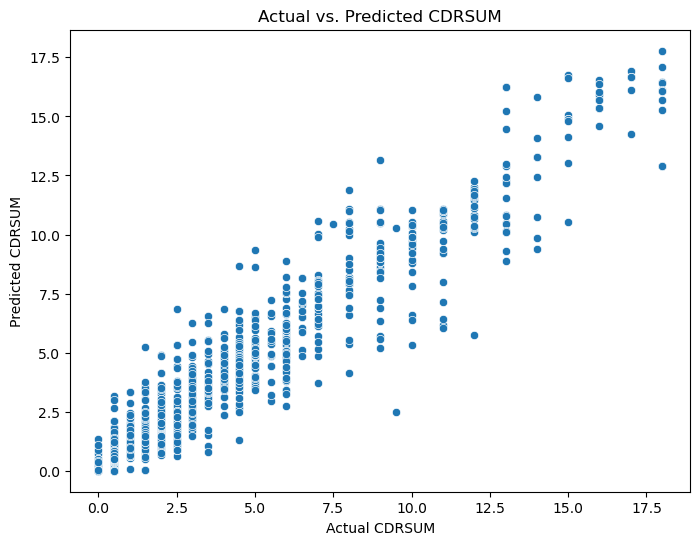

In [198]:
y = df_encoded['CDRSUM']
X = df_encoded.drop(columns=['CDRSUM'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestRegressor object
model3 = RandomForestRegressor(n_estimators=150, random_state=42)  # You can adjust the number of trees with n_estimators

# Fit the model to the training data
model3.fit(X_train, y_train)

# Make predictions on the test data
predictions = model3.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual CDRSUM')
plt.ylabel('Predicted CDRSUM')
plt.title('Actual vs. Predicted CDRSUM')
plt.show()

In [ ]:
# Calculate evaluation metrics
mse_3 = mean_squared_error(y_test, predictions)
r2_3 = r2_score(y_test, predictions)
mae_3 = mean_absolute_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse_3)
print("R-squared:", r2_3)
print("Mean Absolute Error (MAE):", mae_3)

In [ ]:
feature_importances = model3.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Plot

plt.barh(importance_df_sorted['Feature'][:5], importance_df_sorted['Importance'][:5])
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

In [ ]:
tree_to_plot = model3.estimators_[0]

# Plot the selected tree
plt.figure(figsize=(10,6))
plot_tree(tree_to_plot, filled=True, feature_names=X_train.columns, max_depth=2)
# Modify text properties in the plotted tree
for text in plt.gca().texts:
    text.set_fontsize(11)  # Adjust the fontsize as needed


plt.show()

# SVR and LASSO

In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr_model.fit(X_train, y_train)

y_test_pred = svr_model.predict(X_test)

# Evaluate 
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Mean Absolute Error (MAE):", mae)


In [ ]:
from sklearn.linear_model import Lasso


lasso_model = Lasso()  
lasso_model.fit(X_train, y_train)

y_test_pred = lasso_model.predict(X_test)

# Evaluate 
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Mean Absolute Error (MAE):", mae)

# Zero-inflated regressor

In [17]:
#pip install scikit-lego

                                              0.0/211.8 kB ? eta -:--:--
     ---                                   20.5/211.8 kB 640.0 kB/s eta 0:00:01
     ----------                            61.4/211.8 kB 656.4 kB/s eta 0:00:01
     -------------------------------------- 211.8/211.8 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklego.meta import ZeroInflatedRegressor
from sklego.metrics import correlation_score
# Instantiate the zero-inflated regressor.
zir = ZeroInflatedRegressor(
    classifier=SVC(),
    regressor=LinearRegression()
)

# Easy fit!
zir.fit(X_train, y_train)
pred = zir.predict(X_test)

In [21]:
#print('model intercept :', zir.intercept_) 
#print('model coefficients : ', zir.coef_) 
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r2 = r2_score(y_test, pred)
print("R-squared:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.8360233593537983
R-squared: 0.9025884948664429
Mean Absolute Error (MAE): 0.4548307311846409


In [17]:
correlation_score('SEX_2')(zir, X_train, y_train)

-0.13656909770475556

In [28]:
X_train.columns[0]

'NACCAGE'

In [29]:
corr_score = []
for i in X_train.columns:
    scor = correlation_score(i)(zir, X_train, y_train)
    corr_score.append(scor)
corr_score

[-0.10654830552871547,
 -0.06475980527647822,
 -0.1337206137943121,
 -0.026349239421163403,
 -0.07943771152298255,
 -0.13656909770475556,
 -0.00504526571485029,
 -0.007789196658411543,
 -0.0221820880763465,
 -0.017424794405221974,
 -0.03756664749088714,
 -0.05240195295743079,
 -0.01622746751218475,
 -9.36905496526286e-05,
 -0.004808362721077604,
 -0.022551070708522192,
 -0.03380901143298301,
 -0.026274389889331846,
 -0.033377449736114256,
 -0.00811933618018208,
 -0.0359322885269322,
 -0.020985944302195993,
 -0.5632801128120463,
 -0.02811959290662266,
 -0.0361354408624403,
 -0.37491090526933457,
 -0.02918617651843892,
 -0.08929679489233633,
 -0.39149608472286657,
 -0.6544252842326858,
 -0.4720586627526414,
 -0.12592244434671934,
 -0.16990323309492908,
 -0.19106004016373837,
 -0.1544491166096259,
 -0.07296559958579374,
 -0.08189871208858054,
 -0.6456118518915904,
 -0.03458933678975043,
 -0.15321623297897513,
 -0.7209028131251818,
 -0.1669936512083267,
 -0.003682274582066273,
 -0.68099248

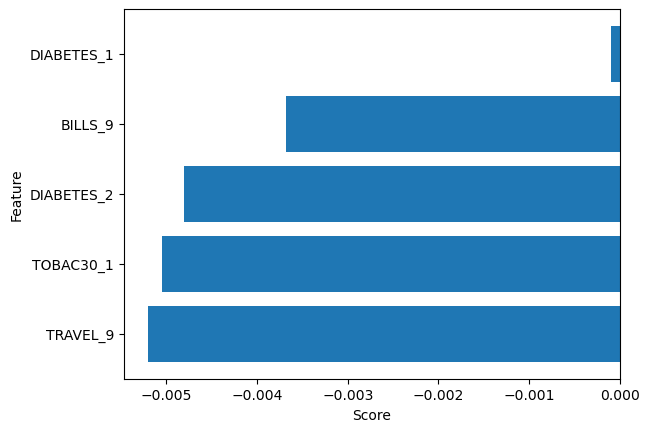

In [31]:
corr_df = pd.DataFrame({'Feature': X.columns, 'Correlation Score': corr_score})
corr_df_sorted = corr_df.sort_values(by='Correlation Score', ascending=False)

top_5c = corr_df_sorted.head(5)

# Plot

plt.barh(top_5c['Feature'], top_5c['Correlation Score'])
plt.xlabel(xlabel = 'Score')
plt.gca().invert_yaxis()  
plt.xticks()
plt.yticks()
plt.ylabel(ylabel = 'Feature')
plt.show()

plt.show()

In [32]:
def alt_correlation_score(column):
    """The correlation score can score how well the estimator predictions correlate with a given column.

    This is especially useful to use in situations where "fairness" is a theme.

    `correlation_score` takes a column on which to calculate the correlation and returns a metric function.

    Parameters
    ----------
    column : str | int
        Name of the column (when X is a dataframe) or the index of the column (when X is a numpy array) to score
        against.

    Returns
    -------
    Callable[..., float]
        A function which calculates the _negative_ correlation between `estimator.predict(X)` and `X[column]`
        (in gridsearch, larger is better and we want to typically punish correlation).

    Examples
    --------
    ```py
    from sklego.metrics import correlation_score
    ...
    correlation_score('gender')(clf, X, y)
    ```
    """

    def correlation_metric(estimator, X, y_true=None):
        """Remember: X is the thing going *in* to your pipeline."""
        sensitive_col = X[:, column] if isinstance(X, np.ndarray) else X[column]
        return (np.corrcoef(estimator.predict(X), sensitive_col)[1, 0])

    return correlation_metric

In [33]:
alt_corr_score = []
for i in X_train.columns:
    scor = alt_correlation_score(i)(zir, X_train, y_train)
    alt_corr_score.append(scor)


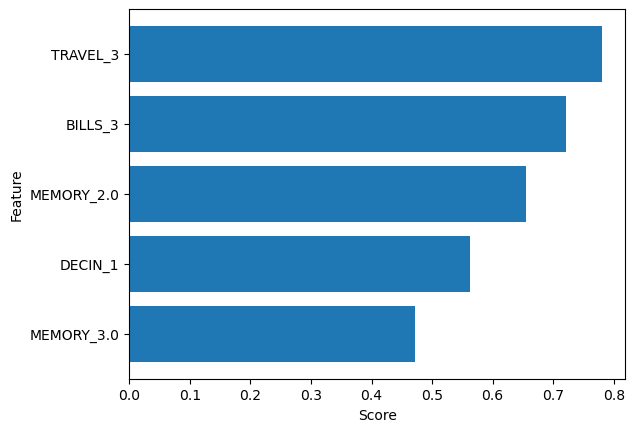

In [34]:
alt_corr_df = pd.DataFrame({'Feature': X.columns, 'Correlation Score': alt_corr_score})
alt_corr_df_sorted = alt_corr_df.sort_values(by='Correlation Score', ascending=False)

alt_top_5c = alt_corr_df_sorted.head(5)

# Plot

plt.barh(alt_top_5c['Feature'], alt_top_5c['Correlation Score'])
plt.xlabel(xlabel = 'Score')
plt.gca().invert_yaxis()  
plt.xticks()
plt.yticks()
plt.ylabel(ylabel = 'Feature')
plt.show()

plt.show()

# Resampling

REDUCED BY 1 TIMES
Mean Squared Error (MSE): 0.4310294402510618
R-squared: 0.951540954975683
Mean Absolute Error (MAE): 0.27027514000486974
Number of True Positives: 1420
Number of TP when Actual value is 0: 1304


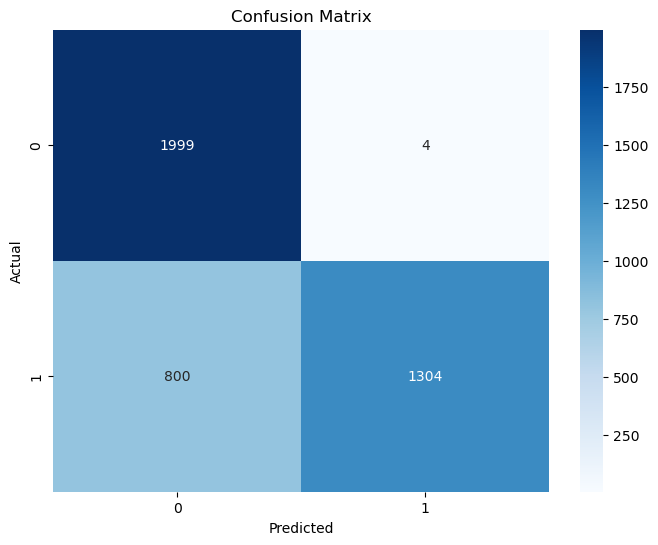

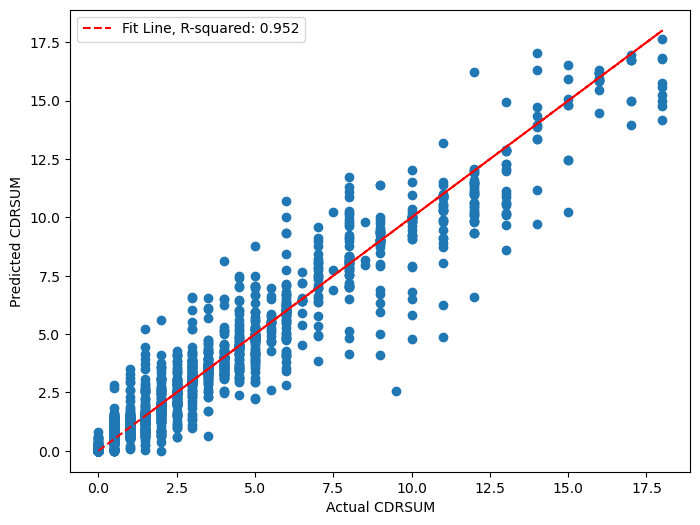

REDUCED BY 3 TIMES
Mean Squared Error (MSE): 0.8055981625674618
R-squared: 0.9298537919534187
Mean Absolute Error (MAE): 0.4293684340625386
Number of True Positives: 324
Number of TP when Actual value is 0: 215


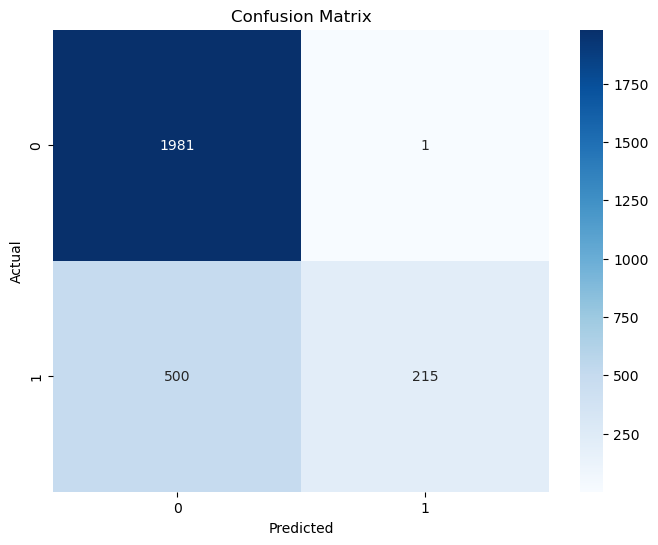

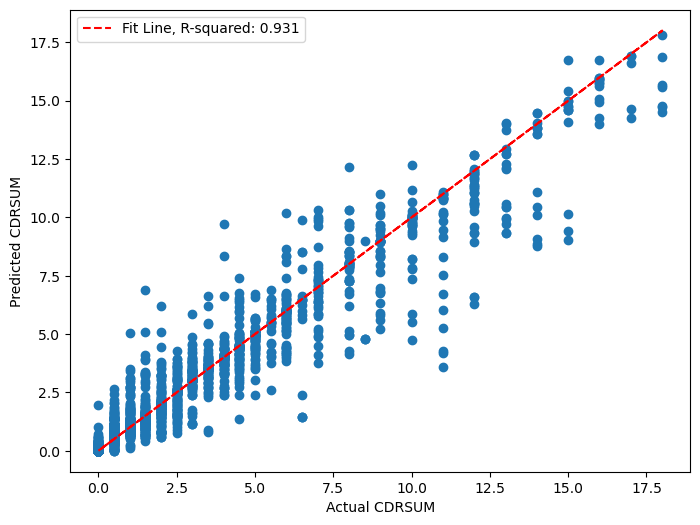

REDUCED BY 5 TIMES
Mean Squared Error (MSE): 0.8343974051069704
R-squared: 0.9258215141481394
Mean Absolute Error (MAE): 0.4677874396135266
Number of True Positives: 185
Number of TP when Actual value is 0: 70


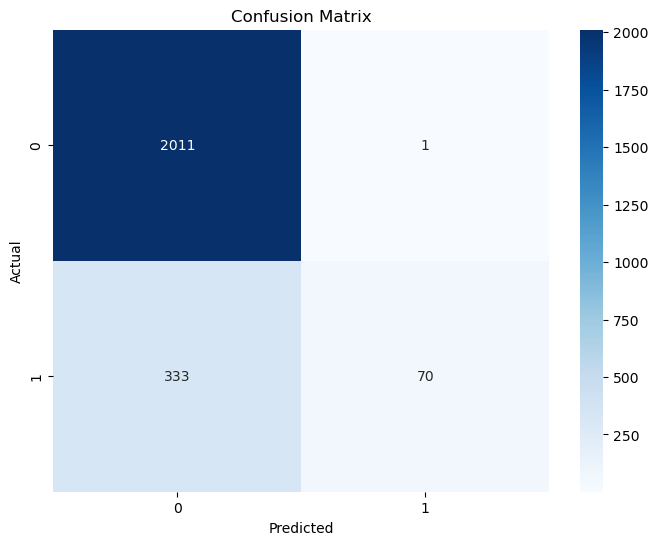

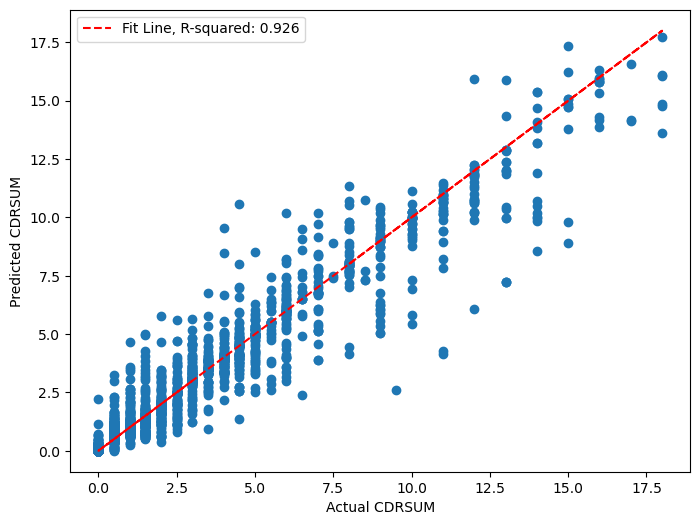

REDUCED BY 7 TIMES
Mean Squared Error (MSE): 0.7889452190752844
R-squared: 0.9303281025907633
Mean Absolute Error (MAE): 0.47663761801016696
Number of True Positives: 148
Number of TP when Actual value is 0: 41


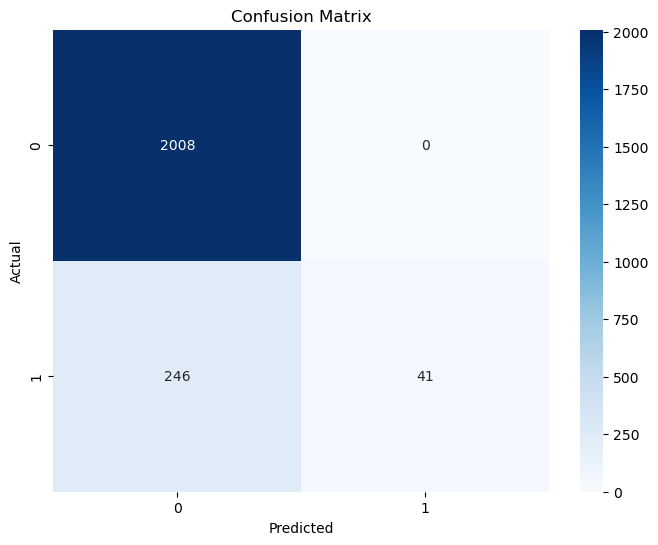

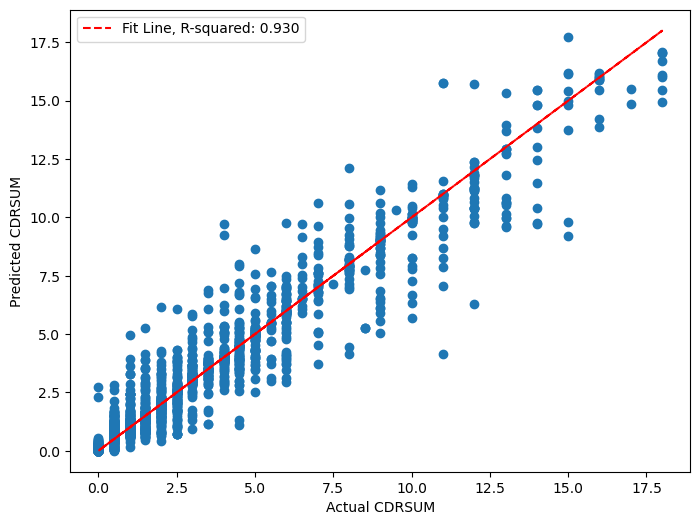

REDUCED BY 9 TIMES
Mean Squared Error (MSE): 0.8738325500174624
R-squared: 0.9264567934093125
Mean Absolute Error (MAE): 0.5135548570573267
Number of True Positives: 121
Number of TP when Actual value is 0: 19


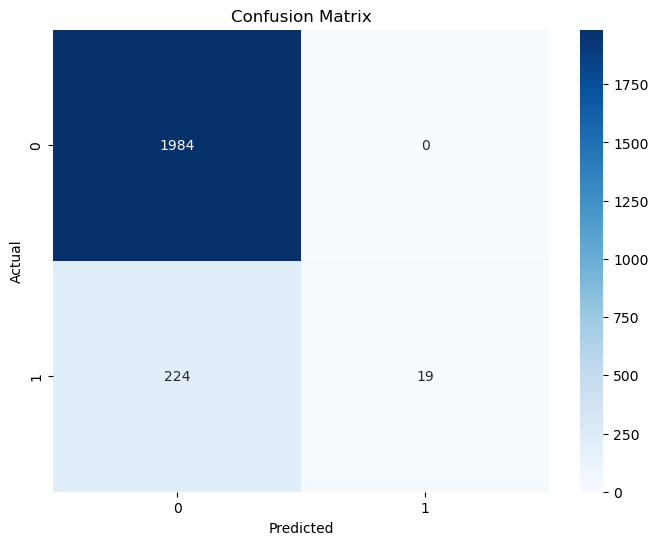

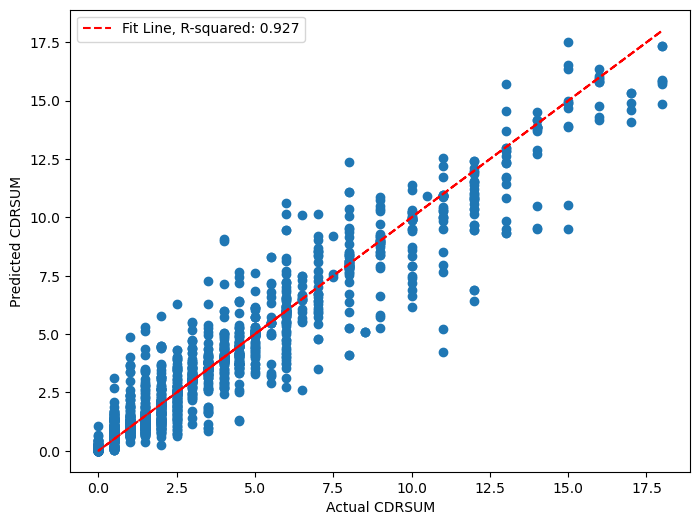

In [217]:
for i in range(1,11,2):
    
    #undersampling, reduce by i times.
    num_zeros = (df_encoded['CDRSUM'] == 0).sum()
    rows_to_keep = num_zeros // i
    df_filtered = df_encoded[df_encoded['CDRSUM'] == 0].sample(n=rows_to_keep)
    df_result = pd.concat([df_encoded[df_encoded['CDRSUM'] != 0], df_filtered])
    
    #model
    y = df_result['CDRSUM']
    X = df_result.drop(columns=['CDRSUM'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model3 = RandomForestRegressor(n_estimators=150, random_state=42)
    model3.fit(X_train, y_train)
    predictions = model3.predict(X_test)
    
    #evaluation metrics
    mse_3 = mean_squared_error(y_test, predictions)
    r2_3 = r2_score(y_test, predictions)
    mae_3 = mean_absolute_error(y_test, predictions)
    print("REDUCED BY", i, "TIMES")
    print("Mean Squared Error (MSE):", mse_3)
    print("R-squared:", r2_3)
    print("Mean Absolute Error (MAE):", mae_3)
    
    true_positives = np.sum(predictions == y_test)
    print("Number of True Positives:", true_positives)
    
    zero_true_positives = np.sum((y_test == 0) & (predictions == 0))
    print("Number of TP when Actual value is 0:", zero_true_positives)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test == 0, predictions == 0)
    
    
    #plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    fit_coefficients = np.polyfit(y_test, predictions, 1)
    y_fit = np.polyval(fit_coefficients, y_test)
    r_squared_fit = r2_score(predictions, y_fit)

    #plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions)
    plt.plot(y_test, y_test, color='red', linestyle='--', label=f'Fit Line, R-squared: {r_squared_fit:.3f}')

    plt.xlabel('Actual CDRSUM')
    plt.ylabel('Predicted CDRSUM')
    plt.legend()
    plt.show()